<a href="https://colab.research.google.com/github/Harhsa/Harhsa/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**________________________________Project-1____Week-3___**

#Loading the Dataset

In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/Data-cleaning-for-beginners-using-pandas.csv')

# Display the first few rows
dataset.head()


,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1


#Checking for Missing Values

In [ ]:
# Check for missing values
missing_values = dataset.isna().sum()
print(missing_values)

# Fill missing 'Rating' with 'Unknown'
dataset['Rating'] = dataset['Rating'].fillna('Unknown')

# Fill missing 'Age' with the average age
avg_age = dataset['Age'].mean()
dataset['Age'] = dataset['Age'].fillna(avg_age)

# Verify that there are no missing values left
dataset.isna().sum()


Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


,0
Index,0
Age,0
Salary,0
Rating,0
Location,0
Established,0
Easy Apply,0


#Data Types and Consistency

In [ ]:
# Check data types
dataset.info()

# Convert 'Age' to integer if necessary
dataset['Age'] = dataset['Age'].astype(int)

# Convert 'Salary' from string to numeric range
dataset['Salary'] = dataset['Salary'].apply(lambda x: x.replace("$", '').replace("k", '000').replace("-", ""))
dataset['Salary'] = dataset['Salary'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        29 non-null     int64  
 1   Age          29 non-null     float64
 2   Salary       29 non-null     object 
 3   Rating       29 non-null     object 
 4   Location     29 non-null     object 
 5   Established  29 non-null     int64  
 6   Easy Apply   29 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.7+ KB


#Handling Outliers

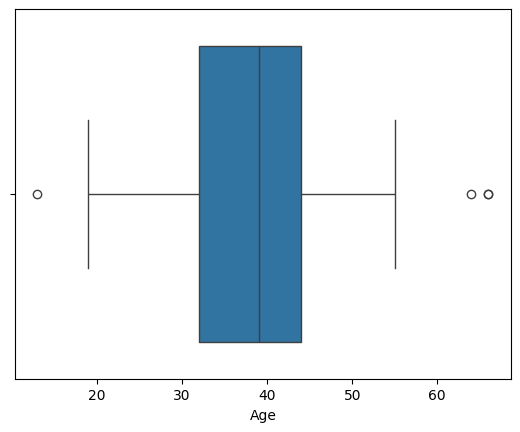

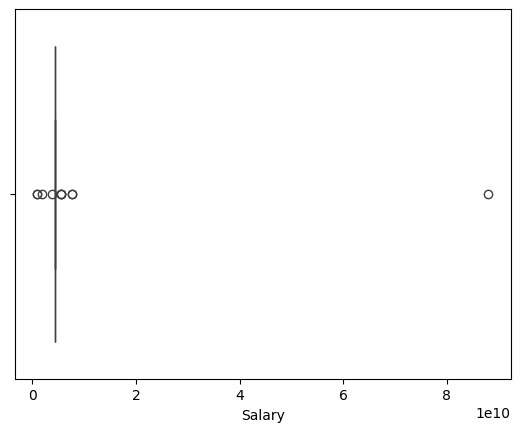

In [ ]:
# Check for outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for 'Age'
sns.boxplot(x=dataset['Age'])
plt.show()

# Boxplot for 'Salary'
sns.boxplot(x=dataset['Salary'])
plt.show()

# You can remove outliers if necessary
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5 * IQR from Q1 or Q3
age_outliers = dataset[(dataset['Age'] < Q1 - 1.5 * IQR) | (dataset['Age'] > Q3 + 1.5 * IQR)]
dataset = dataset[~dataset.index.isin(age_outliers.index)]


#Standardizing the Location Column

In [ ]:
# Standardize location names
dataset['Location'] = dataset['Location'].str.replace('Australia Aus', 'Australia,Aus')
dataset['Location'] = dataset['Location'].str.replace('India In', 'India,In')

# Extract the country part of the location
dataset['New_Location'] = dataset['Location'].str.split(",", expand=True)[0]

# Check the unique values in New_Location
dataset['New_Location'].value_counts()


,count
New_Location,
New York,10
India,9
Australia,6


#Handling the Established Column

In [ ]:
# Replace invalid years with the mode or mean
valid_years = dataset[dataset['Established'] > 0]
dataset['Established'] = dataset['Established'].replace(-1, valid_years['Established'].mode()[0])

# Check if all values are now valid
dataset['Established'].describe()


,Established
count,25.000000
mean,1980.920000
std,28.037059
min,1932.000000
25%,1954.000000
50%,1999.000000
75%,1999.000000
max,2019.000000


#Analyzing the Easy Apply Indicator

In [ ]:
# Convert 'Easy Apply' to boolean if it's not
dataset['Easy Apply'] = dataset['Easy Apply'].astype(bool)

# Check the unique values
dataset['Easy Apply'].unique()


array([ True])

#Ensuring a Consistent Rating Scale

In [ ]:
# Convert 'Rating' to numeric, replacing 'Unknown' with NaN
dataset['Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')

# Check the range of values
print("Rating range:", dataset['Rating'].min(), "to", dataset['Rating'].max())

# If necessary, normalize or adjust the scale
dataset['Rating'] = dataset['Rating'].fillna(dataset['Rating'].mean())


Rating range: -1.0 to 7.8


#Final Data Integrity Check

In [ ]:
# Ensure that 'Age' and 'Established' make sense together
# For example, 'Age' should be greater than or equal to the difference between current year and 'Established'
current_year = 2024  # Replace with the current year

dataset['Company_Age'] = current_year - dataset['Established']
inconsistent_entries = dataset[dataset['Age'] < dataset['Company_Age']]

# Handle inconsistencies as needed, e.g., review or correct data


#Handling Special Characters in Text Columns

In [ ]:
# Remove any special characters from text columns, e.g., 'Location'
dataset['Location'] = dataset['Location'].str.replace(r'[^a-zA-Z0-9, ]', '', regex=True)


#Data Integrity:


In [ ]:
# Calculate the company age based on the Established year
current_year = 2024  # Replace with the actual current year
dataset['Company_Age'] = current_year - dataset['Established']

# Check if 'Age' is greater than or equal to 'Company_Age'
inconsistent_entries = dataset[dataset['Age'] < dataset['Company_Age']]
print(inconsistent_entries)

# Handle inconsistencies
# For example, you might replace invalid ages or established years


    Index  Age      Salary  Rating       Location  Established  Easy Apply  \
6       6   21  4400099000  0.0000    New York,Ny         1999        True   
9       9   22  4400099000  7.7000       India,In         1999        True   
16     16   19  1900040000  4.5000       India,In         1984        True   
17     17   39  4400099000  5.3000    New York,Ny         1943        True   
18     18   35  4400099000  6.7000    New York,Ny         1954        True   
19     19   32  4400099000  3.3000    New York,Ny         1955        True   
20     20   39  4400099000  5.7000    New York,Ny         1944        True   
21     21   35  4400099000  5.0000    New York,Ny         1946        True   
22     22   19  5500066000  7.8000    New York,Ny         1988        True   
26     26   39  5500066000  3.6625       India,In         1934        True   
27     27   52  4400099000  5.4000       India,In         1935        True   
28     28   39  3900088000  3.4000  Australia,Aus         1932  

#Easy Apply Transformation:

In [ ]:
# Convert 'Easy Apply' to boolean if it is not
dataset['Easy Apply'] = dataset['Easy Apply'].astype(bool)

# Verify the transformation
print(dataset['Easy Apply'].unique())


[ True]


# Location Accuracy:

In [ ]:
# Check for unique values in the 'Location' column
unique_locations = dataset['Location'].unique()
print(unique_locations)

# Correct any misspelled or ambiguous locations
# Example: Replace misspelled locations
dataset['Location'] = dataset['Location'].replace({
    'Austrlia': 'Australia',
    'Inda': 'India'
})

# Verify the corrections
print(dataset['Location'].unique())


['India,In' 'New York,Ny' 'Australia,Aus']
['India,In' 'New York,Ny' 'Australia,Aus']


#Handling Categorical Data:

In [ ]:
# Convert categorical data to numerical using one-hot encoding
location_dummies = pd.get_dummies(dataset['Location'], prefix='Location')

# Add the encoded columns to the dataset
dataset = pd.concat([dataset, location_dummies], axis=1)

# Drop the original 'Location' column if necessary
dataset = dataset.drop(columns=['Location'])

# Verify the transformation
dataset.head()


,Index,Age,Salary,Rating,Established,Easy Apply,New_Location,Company_Age,"Location_Australia,Aus","Location_India,In","Location_New York,Ny"
0,0,44,4400099000,5.4,1999,True,India,25,False,True,False
2,2,39,7700089000,-1.0,1999,True,New York,25,False,False,True
4,4,25,4400099000,6.4,2002,True,Australia,22,True,False,False
5,5,44,7700089000,1.4,1999,True,India,25,False,True,False
6,6,21,4400099000,0.0,1999,True,New York,25,False,False,True


#Consistent Rating Scale:

In [ ]:
# If Rating scale is inconsistent, normalize it to a common scale (e.g., 0-5)
max_rating = 5  # Define the maximum rating
dataset['Rating'] = dataset['Rating'] / dataset['Rating'].max() * max_rating

# Verify the transformation
print("Rating range after normalization:", dataset['Rating'].min(), "to", dataset['Rating'].max())


Rating range after normalization: -0.6410256410256411 to 5.0


#**_________Project**-**2_____Week**-**3_____**

In [ ]:
import pandas as pd
import numpy as np
df2 = pd.read_csv("/content/chipotle.tsv",sep='\t')

#Missing Values:

In [ ]:
df2.isna().sum()
# Handling missing values
df2['choice_description'] = df2['choice_description'].replace(np.nan, "Not Available")
df2.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,Not Available,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,Not Available,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#Data Types

In [ ]:
df2.isna().sum()
# Handling missing values
df2['choice_description'] = df2['choice_description'].replace(np.nan, "Not Available")
df2.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,Not Available,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,Not Available,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#Duplicated Entries

In [ ]:
df2[df2.duplicated()]
df3 = df2.drop_duplicates()
df3.shape  # Verify the number of rows after dropping duplicates


(4563, 5)

#Quantity and Item Price

In [ ]:
df3.describe()  # Check for any anomalies in quantity and price


,order_id,quantity
count,4563.000000,4563.000000
mean,927.045803,1.076704
std,528.936100,0.412739
min,1.000000,1.000000
25%,476.500000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


#Choice Description

In [ ]:
df3['choice_description'].value_counts()
# You can choose to group items with similar descriptions or keep them separate for detailed analysis.


,count
choice_description,
Not Available,1228
[Diet Coke],133
[Coke],115
[Sprite],77
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",41
...,...
"[Tomatillo Green Chili Salsa, [Sour Cream, Cheese, Guacamole, Rice, Fajita Vegetables]]",1
"[Fresh Tomato Salsa (Mild), [Pinto Beans, Black Beans, Rice, Cheese, Sour Cream, Lettuce]]",1
"[[Fresh Tomato Salsa (Mild), Roasted Chili Corn Salsa (Medium), Tomatillo-Red Chili Salsa (Hot)], [Pinto Beans, Cheese, Sour Cream, Lettuce]]",1


#Handling Special Characters

In [ ]:
# Use .loc to safely modify the DataFrame without triggering the SettingWithCopyWarning
df3.loc[:, 'item_name'] = df3['item_name'].str.replace('[^\w\s]', '', regex=True)
df3.loc[:, 'choice_description'] = df3['choice_description'].str.replace('[^\w\s]', '', regex=True)


#Order ID Integrity

In [ ]:
df3['order_id'].nunique()  # Count unique Order IDs


1834

#Item Name Standardization

In [ ]:
df3['item_name'].value_counts()  # Review variations and decide on standardization if necessary


,count
item_name,
Chicken Bowl,717
Chicken Burrito,546
Chips and Guacamole,474
Steak Burrito,365
Canned Soft Drink,290
Steak Bowl,210
Chips,208
Bottled Water,155
Chicken Soft Tacos,111


#Quantity and Price Relationships:

In [ ]:
# Step 1: Convert item_price to a numeric type
df3.loc[:, 'item_price'] = df3['item_price'].str.replace('$', '', regex=False).astype(float)

# Step 2: Calculate revenue
df3.loc[:, 'revenue'] = df3['quantity'] * df3['item_price']

# Verify the first few rows
df3.head()


,order_id,quantity,item_name,choice_description,item_price,revenue
0,1.0,1.0,Chips and Fresh Tomato Salsa,Not Available,2.39,2.39
1,1.0,1.0,Izze,Clementine,3.39,3.39
2,1.0,1.0,Nantucket Nectar,Apple,3.39,3.39
3,1.0,1.0,Chips and TomatilloGreen Chili Salsa,Not Available,2.39,2.39
4,2.0,2.0,Chicken Bowl,TomatilloRed Chili Salsa Hot Black Beans Rice ...,16.98,33.96


#Data Integrity Check:

In [ ]:
df3.groupby('item_name').agg({'quantity': 'sum', 'revenue': 'sum'}).sort_values(by='quantity', ascending=False).head(5)


,quantity,revenue
item_name,,
Chicken Bowl,752.0,7961.65
Chicken Burrito,584.0,6320.81
Chips and Guacamole,501.0,2453.37
Steak Burrito,383.0,4203.64
Canned Soft Drink,340.0,590.0


#Quantity of Each Item

In [ ]:
x = df3.groupby('item_name').sum()
x = x.sort_values(['quantity'], ascending=False)
x.head(5)  # Display the top 5 items


,order_id,quantity,choice_description,item_price,revenue
item_name,,,,,
Chicken Bowl,704980.0,752.0,TomatilloRed Chili Salsa Hot Black Beans Rice ...,7259.75,7961.65
Chicken Burrito,490718.0,584.0,TomatilloGreen Chili Salsa Medium Pinto Beans ...,5509.57,6320.81
Chips and Guacamole,443669.0,501.0,Not AvailableNot AvailableNot AvailableNot Ava...,2178.79,2453.37
Steak Burrito,327829.0,383.0,Tomatillo Red Chili Salsa Fajita Vegetables Bl...,3818.94,4203.64
Canned Soft Drink,296817.0,340.0,CokeSpriteCokeCokeLemonadeSpriteDiet CokeCokeC...,425.0,590.0


#Most Ordered Item in Choice Description

In [ ]:
df3['choice_description'].value_counts().head(1)


,count
choice_description,
Not Available,1228


#Total Number of Items Ordered

In [ ]:
df3['quantity'].sum()


4913.0

#Total Revenue

In [ ]:
df3['revenue'].sum()


38914.11000000007

#Total Number of Orders

In [ ]:
df3['order_id'].nunique()


1834

#Average Revenue per Order

In [ ]:
d = df3.groupby(by=['order_id']).sum()
d['revenue'].mean()


21.21816248636858

#Number of Different Items Sold

In [ ]:
df3['item_name'].nunique()


50

#1. Quantity of Each Item

In [ ]:
# Group by item_name and sum the quantities
item_quantities = df3.groupby('item_name')['quantity'].sum()

# Display the top 5 items by quantity ordered
item_quantities.sort_values(ascending=False).head()


,quantity
item_name,
Chicken Bowl,752.0
Chicken Burrito,584.0
Chips and Guacamole,501.0
Steak Burrito,383.0
Canned Soft Drink,340.0


#2. What Was the Most Ordered Item in the choice_description Column?

In [ ]:
# Find the most common choice_description
most_ordered_choice = df3['choice_description'].value_counts().idxmax()

# Count how many times it was ordered
most_ordered_choice_count = df3['choice_description'].value_counts().max()

most_ordered_choice, most_ordered_choice_count


('Not Available', 1228)

#3. How Many Items Were Ordered in Total?

In [ ]:
# Sum the quantity column to get the total number of items ordered
total_items_ordered = df3['quantity'].sum()

total_items_ordered


4913.0

#4. How Much Was the Revenue for the Period in the Dataset?

In [ ]:
# Calculate the total revenue
total_revenue = df3['revenue'].sum()

total_revenue


38914.11000000007

#5. How Many Orders Were Made in the Period?

In [ ]:
# Count the number of unique order_ids
total_orders = df3['order_id'].nunique()

total_orders


1834

#6. What Is the Average Revenue Amount per Order?

In [ ]:
# Group by order_id and sum the revenue for each order
order_revenue = df3.groupby('order_id')['revenue'].sum()

# Calculate the average revenue per order
average_revenue_per_order = order_revenue.mean()

average_revenue_per_order


21.21816248636858

#7. How Many Different Items Are Sold?

In [ ]:
# Count the number of unique items
unique_items_sold = df3['item_name'].nunique()

unique_items_sold


50